# Test - Notebook.

En esta notebook se buscara predecir comentarios que se generaron utilizando una herramienta de AI, esto se realizo como un paso mas para testear la performance del modelo y el pipeline generado.

# Imports

In [1]:
from src.comment_analyzer import Comment_Analyzer
import pandas as pd

# Predicciones y prueba de modelo.

In [2]:
path_data_simulada = './data/simulada/'
name_data_simulada = path_data_simulada + 'test_comments.csv'

path_to_model = './models/'
name_model = path_to_model + 'comment_sentiment_analysis_model.pkl'
name_vectorizer = path_to_model + 'word_vectorizer/fit_count_vectorizer.pkl'

In [3]:
analyzer_instance = Comment_Analyzer(
    path_to_comments=name_data_simulada,
    vectorizer_path=name_vectorizer,
    model_path=name_model,
)

Cantidad de registros sin contenido = 5
Cantidad de registros sin titulo = 15
Vectorizador cargado correctamente...
Modelo cargado correctamente...
LGBMClassifier(max_depth=5, min_child_samples=5, min_data_in_leaf=10,
               min_split_gain=0.3, n_jobs=-1, num_leaves=20, random_state=24)
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=10


In [4]:
raw_data = analyzer_instance.raw_data

print(raw_data.shape)
print(raw_data['target'].value_counts())
raw_data.sample(5)

(315, 3)
target
0    106
1    105
2    104
Name: count, dtype: int64


,title,content,target
308,,La calidad es aceptable.,1
130,Malo,Sin quejas ni elogios.,1
191,Bueno,"Es un producto regular, cumple con lo básico.",1
64,Calidad y precio,Cumple con lo justo.,1
38,Malo,No se ajusta a la descripción.,0


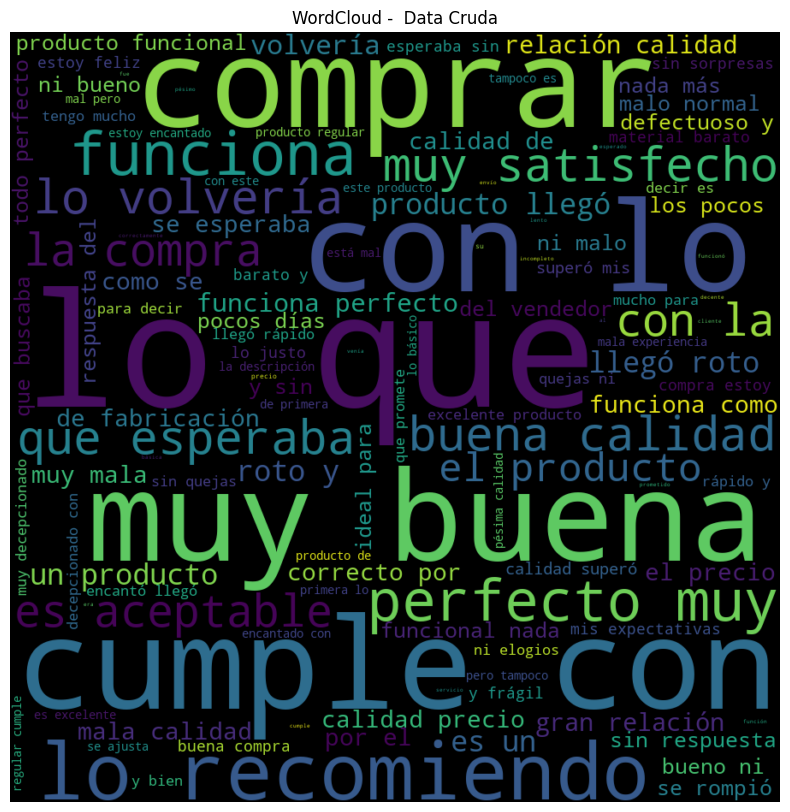

In [5]:
analyzer_instance.return_word_cloud(on_data='raw')

In [6]:
clean_data = analyzer_instance.clean_data
clean_data.sample(5)

,title,content,target,text_label
59,Malo,Defectuoso y sin respuesta del vendedor.,0,mal defectu y sin respuest del vendedor
90,Calidad y precio,"No tengo mucho para decir, es aceptable.",1,calid y preci no teng much par dec es acept
76,Calidad y precio,Muy decepcionado con la compra.,0,calid y preci muy decepcion con la compr
244,Excelente,"Todo perfecto, 10/10.",2,excelent tod perfect
49,Excelente,"Muy buena calidad, superó mis expectativas.",2,excelent muy buen calid super mis expect


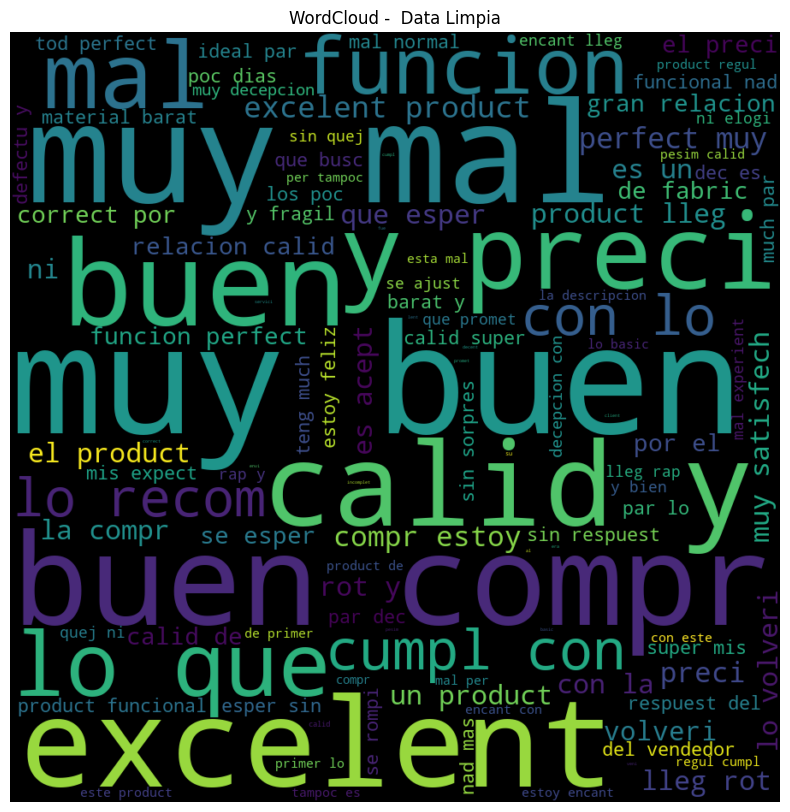

In [7]:
analyzer_instance.return_word_cloud(on_data='clean')

In [8]:
analyzer_instance.processed_data.sample(5)

,abaj,abaj no,abast,abiert,abiert esper,abrazader,abrazader instal,abrazader no,abrir,abrir mas,...,wifi,wifi alumbr,zapat,zapat circul,zebr,zebr adquiri,zon,zon utiliz,zumb,zumb conect
302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


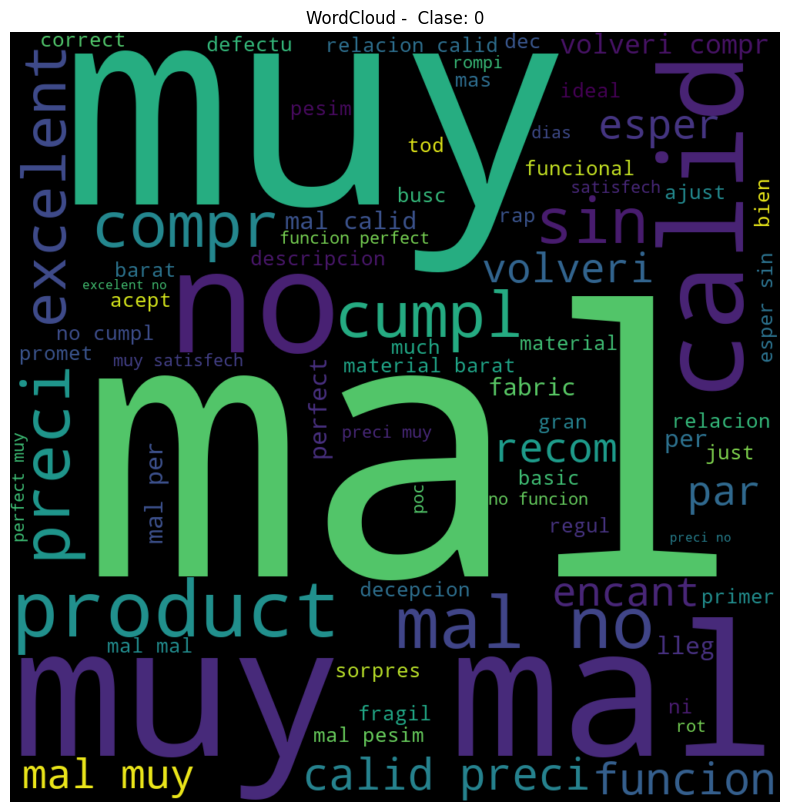

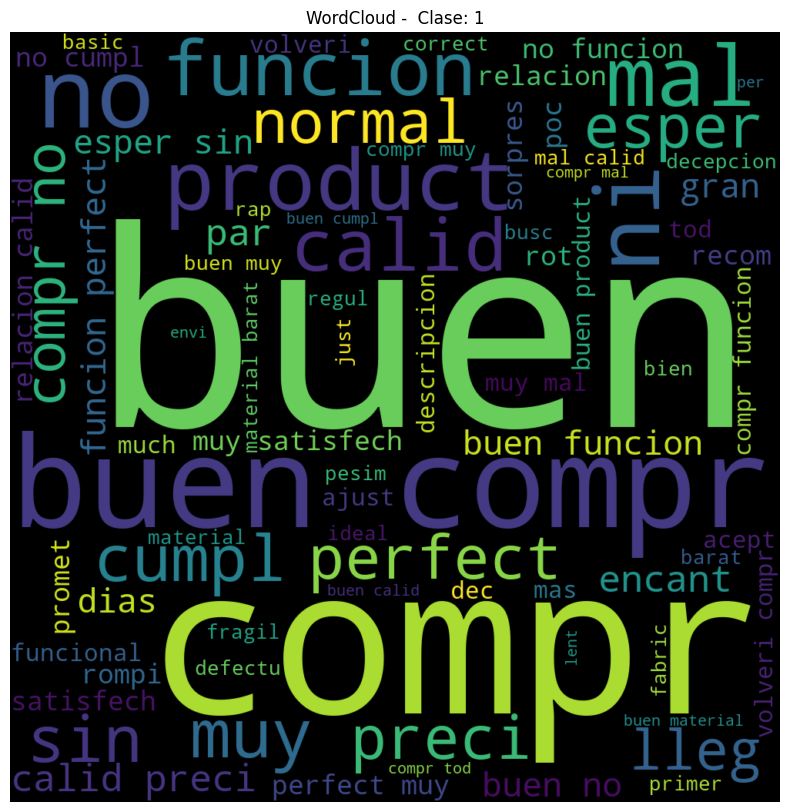

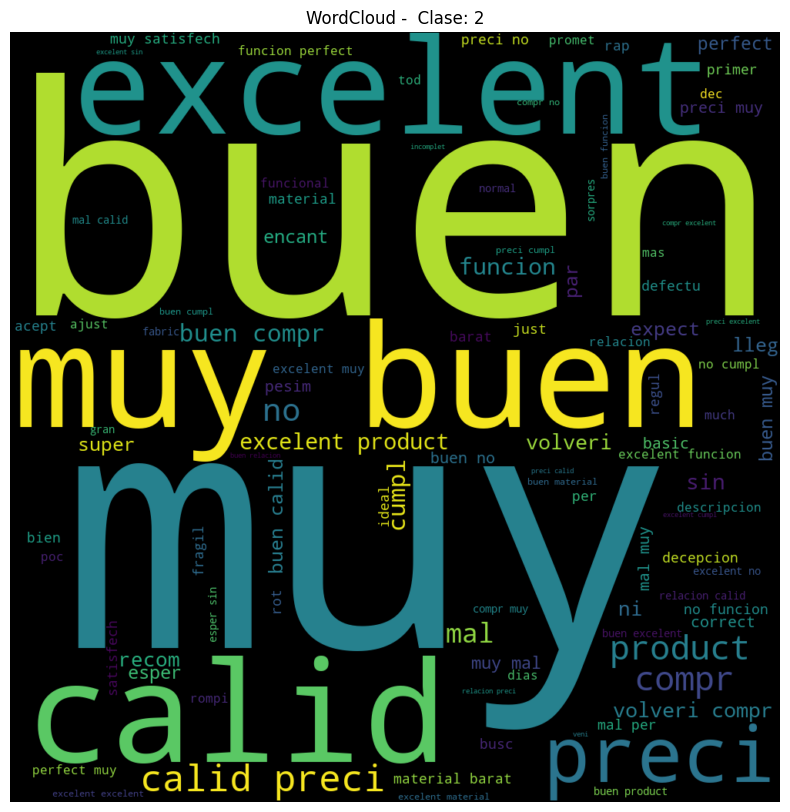

In [9]:
analyzer_instance.return_word_cloud(on_data='predicted')

In [10]:
pd.Series(analyzer_instance.predictions).value_counts()

2    156
0     82
1     77
Name: count, dtype: int64

In [11]:
clean_data['predicted_target'] = analyzer_instance.predictions

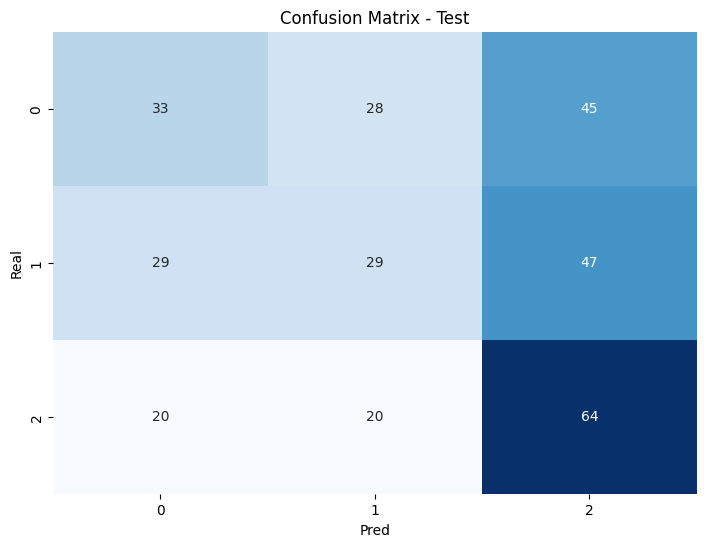

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(
    clean_data['target'],
    clean_data['predicted_target']
)

plt.figure(figsize=(8.3,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Pred")
plt.ylabel("Real")
plt.title("Confusion Matrix - Test")
plt.show()